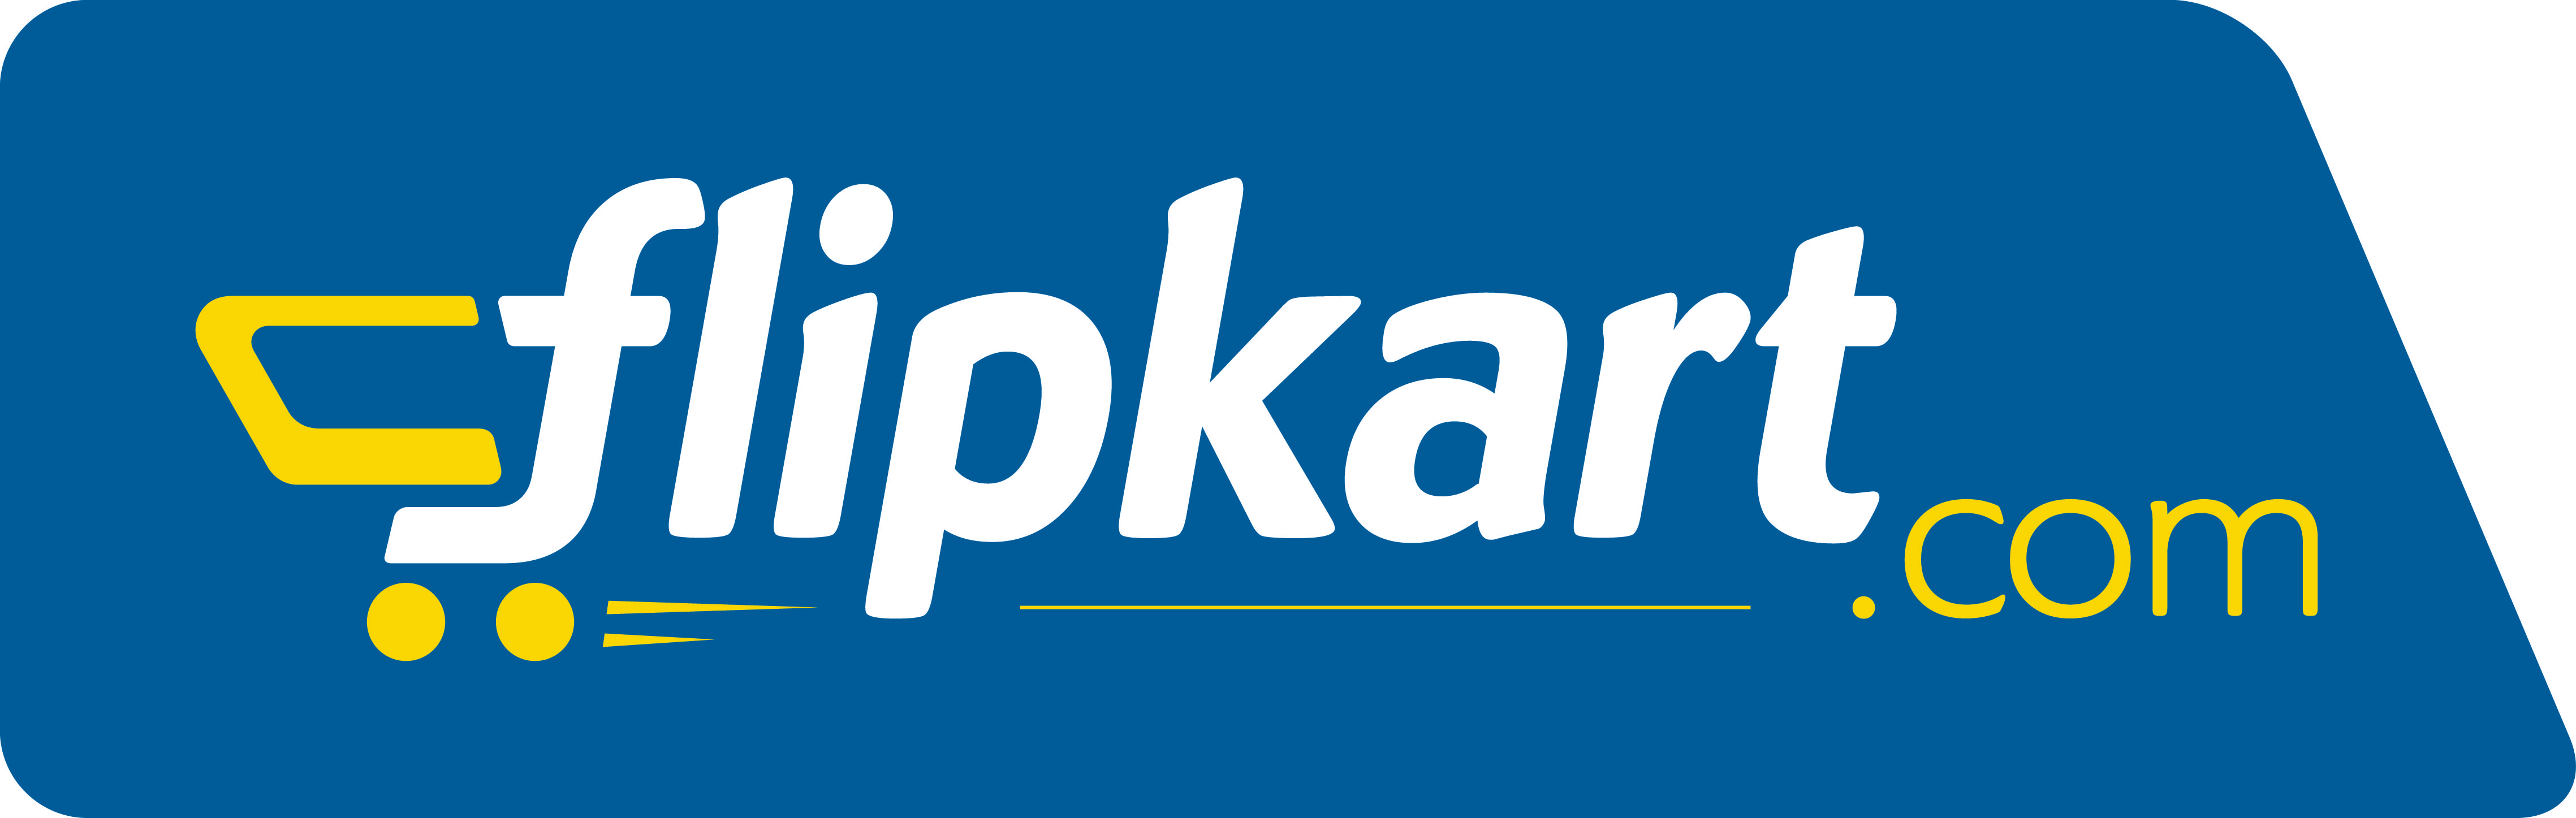

In [76]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from  sklearn.preprocessing import LabelEncoder

In [77]:
df=pd.read_csv('C://Users//HP//Documents//Flipkart_mobile_brands_scraped_data.csv')

In [78]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0


In [79]:
df.shape

(2647, 8)

In [80]:
df.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

In [81]:
df.isnull().sum()

Brand                0
Model                2
Color              142
Memory              42
Storage             79
Rating               0
Selling Price        3
Original Price    1678
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [84]:
labelencode= LabelEncoder()

In [85]:
textcol =['Brand','Model','Color','Memory','Storage']

In [86]:
for col in textcol:
    df[col]=labelencode.fit_transform(df[col])

In [87]:
df.dtypes

Brand               int32
Model               int32
Color               int32
Memory              int32
Storage             int32
Rating            float64
Selling Price     float64
Original Price    float64
dtype: object

In [88]:
x=df[['Color', 'Memory', 'Storage', 'Rating',
       'Selling Price']]

In [89]:
kmeans= KMeans(n_clusters=3,random_state=42)

In [90]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [91]:
kmeans.fit(x)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [92]:
df['cluster']=kmeans.labels_

In [93]:
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,cluster
0,9,41,192,8,7,4.5,11990.0,15990.0,1
1,9,41,184,8,7,4.5,11990.0,15990.0,1
2,9,41,192,11,0,4.3,13990.0,17990.0,1
3,9,41,184,11,0,4.3,13990.0,17990.0,1
4,9,41,101,8,7,4.5,11990.0,15990.0,1


In [94]:
silhouette=silhouette_score(x,df['cluster'])

In [95]:
silhouette

0.6777680372928184